# PS2 Appendix: KS test 

## Index
1. numpyを用いてgenerate  multivariate normal random variables
2. scipyを用いてgenerate  multivariate normal random variables
3. scatter plot colored by density
4. 一様分布に従う変数からnormal distributionに従うデータを作る, 正規分布のKS testを実施する
5. 問題4のKS testの統計量をsample sizeを変化させて調査してみる

## 資料
- [John Cook](https://malishoaib.wordpress.com/2014/04/02/python-code-and-normal-distribution-writing-cdf-from-scratch/)

## Q1 : 二変数正規分布に従うrandom variablesの作成

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10101)

In [2]:
sample_size = 5000
mean = [3, 5]
cov = [[1 , 2], [2, 10]]

x, y = np.random.multivariate_normal(mean, cov, sample_size).T

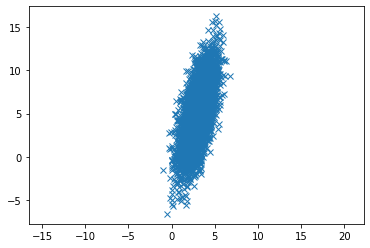

In [3]:
plt.plot(x, y, 'x')

### x軸とy軸のスケールを揃える
plt.axis('equal');

## Q2 : scipyで変数作成

In [4]:
from scipy.stats import multivariate_normal

In [5]:
rv = multivariate_normal(mean, cov)

## generate random samples
data_scipy = rv.rvs(size  = sample_size) 

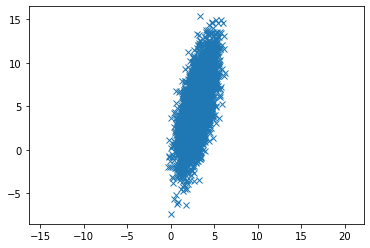

In [6]:
plt.plot(data_scipy[:, 0], data_scipy[:, 1], 'x')
plt.axis('equal');

## Q3 : densityごとに色分けしたscatter plot

In [7]:
density = rv.pdf(data_scipy)

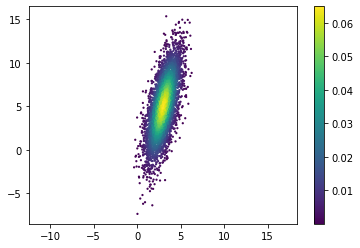

In [8]:
fig, ax = plt.subplots()
plot_fig = ax.scatter(data_scipy[:, 0], data_scipy[:, 1]
           , c = density,s = 5, edgecolor='')
plt.colorbar(plot_fig)
plt.axis('equal');

## Q4 : 一様分布に従う変数からnormal distributionに従うデータを作る

In [9]:
from scipy.stats import norm
from scipy.stats import kstest

In [10]:
### inverse function of normal cdf
def inverse_cdf(p):
    import math
    
    """
    function : 正規分布cdfの逆関数
    input: prob in [0, 1]
    return : 正規分布のvalue
    """
    
    def formula(t):
    #constants
        c0 = 2.515517
        c1 = 0.802853
        c2 = 0.010328
        d0 = 1.432788
        d1 = 0.189269
        d2 = 0.001308  
 
        # Formula
        p = t - ((c2*t + c1)*t + c0) / (((d2*t + d1)*t + d0)*t + 1.0)
        return  p
    
    if (p < 0.5):
        #F^-1(p) = - G^-1(p)
        return -formula( math.sqrt(-2.0*math.log(p)))
 
    else:
        #F^-1(p) = G^-1(1-p)
        return formula( math.sqrt(-2.0*math.log(1-p)))

### 手順
1. $[0, 1]$ 一様分布に従う変数, `unifrom_rv`, を作成
2. `unifrom_rv`を用いて正規分布乱数を作成
3. KS test
4. sample sizeごとに評価

In [11]:
sample = 5000
uniform_rv = np.random.uniform(0, 1, sample)

In [12]:
### vectorize
_inverse_cdf = np.vectorize(inverse_cdf)
norm_rv = _inverse_cdf(uniform_rv)

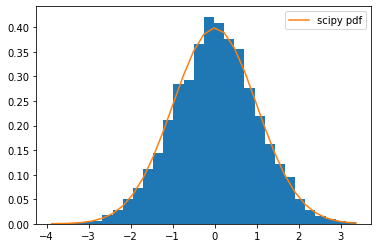

In [13]:
freq,bins, ignore = plt.hist(norm_rv, 
                              bins = 30, density = True)
plt.plot(bins, norm.pdf(bins), label = 'scipy pdf')
plt.legend();


In [14]:
### KS test
kstest(rvs = norm_rv, cdf = 'norm')

KstestResult(statistic=0.015122755166212143, pvalue=0.20293317672226324)

## Q5 : sample sizeとKS test statisticsのplot

In [15]:
sample_array = np.arange(100, 5000, 1)

In [16]:
def ks_simulation(_sample_array):
    y_D = []
    y_p = []
    
    for i in _sample_array:
        np.random.seed(i)
        uniform_rv = np.random.uniform(0, 1, i)
        norm_rv = _inverse_cdf(uniform_rv)
        D, p_val = kstest(rvs = norm_rv, cdf = 'norm')
        
        y_D.append(D)
        y_p.append(p_val)
    
    return y_D, y_p

In [17]:
D, p_val = ks_simulation(sample_array)

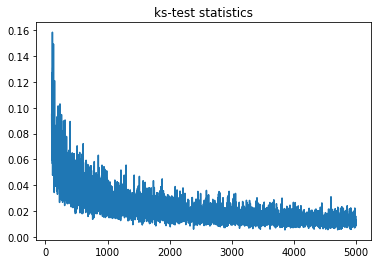

In [18]:
plt.plot(sample_array, D)
plt.title('ks-test statistics');

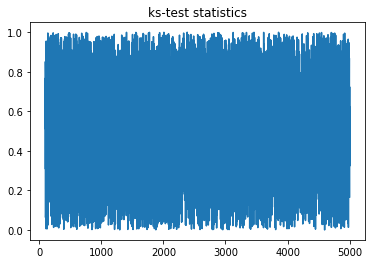

In [19]:
plt.plot(sample_array, p_val)
plt.title('ks-test statistics');

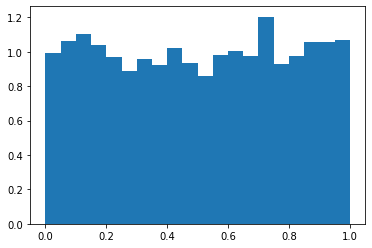

In [20]:
plt.hist(p_val, 20, density = True);

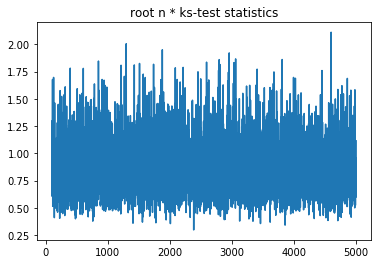

In [21]:
plt.plot(sample_array, D*np.sqrt(sample_array))
plt.title('root n * ks-test statistics');